# **Import data**

In [21]:
import pandas as pd
import numpy as np
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [31]:
def read_json_to_dataframe(file_path):
    return pd.read_json(file_path)

# change file path to your own directory
set1_human = read_json_to_dataframe('/kaggle/input/sml-asmt1/set1_human.json')
set1_machine = read_json_to_dataframe('/kaggle/input/sml-asmt1/set1_machine.json')
set2_human = read_json_to_dataframe('/kaggle/input/sml-asmt1/set2_human.json')
set2_machine = read_json_to_dataframe('/kaggle/input/sml-asmt1/set2_machine.json')
predict_x = read_json_to_dataframe('/kaggle/input/sml-asmt1/test.json')

In [43]:
set1_human.head()

,prompt,txt
0,"[1759, 4203, 1493, 3153, 1499]","[1479, 3457, 2277, 1827, 1493, 2582, 3723, 147..."
1,"[1502, 1557, 1487, 1479, 3402, 1551, 1602, 286...","[721, 2820, 1676, 4, 76, 2130, 1502, 1591, 148..."
2,"[3650, 1822, 1500, 4075, 15, 1510, 87, 1683, 1...","[2732, 3882, 1801, 1479, 2833, 2622, 2874, 156..."
3,"[1518, 2556, 15, 1612, 1490, 1598, 2409, 1484,...","[1479, 4758, 1734, 1511, 1500, 1479, 91, 10, 8..."
4,"[1518, 1519, 4640, 2858, 1865, 1622, 1520, 147...","[4683, 1751, 2004, 1485, 1499, 15, 1574, 2193,..."


In [44]:
set1_machine.head()

,machine_id,prompt,txt
0,0,"[68, 4405, 1939, 1525, 2932, 1478, 68, 2766, 3...","[1755, 68, 1971, 2453, 1500, 3309, 1488, 1589,..."
1,0,"[1985, 68, 2552, 1939, 1764, 1479, 1763, 3233,...","[1518, 1492, 10, 86, 68, 3342, 15, 2184, 17, 1..."
2,0,"[1985, 68, 16, 83, 2924, 1939, 1551, 1480, 153...","[76, 10, 1510, 1884, 2131, 1485, 1985, 1698, 1..."
3,0,"[1571, 10, 1510, 1617, 2588, 4137, 68, 24, 192...","[1518, 1550, 2701, 1505, 4, 34, 1520, 68, 2323..."
4,0,"[1532, 2432, 87, 1499, 1523, 86, 17]","[1479, 1875, 3802, 1693, 1494, 2000, 1495, 299..."


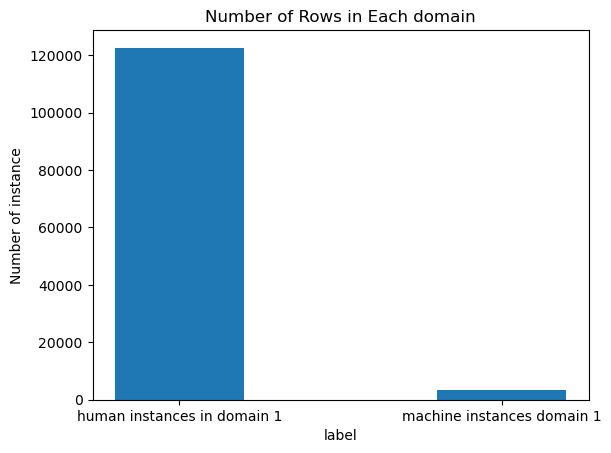

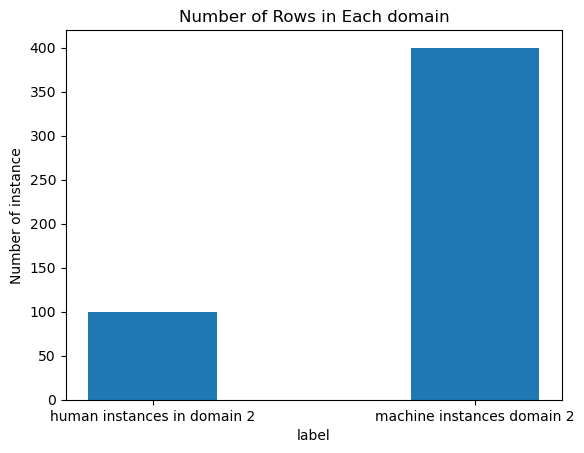

In [46]:
def plot_num_rows(dataframes, labels):
    num_rows = [len(df) for df in dataframes]
    plt.bar(labels, num_rows, width=0.4)  # Added width parameter here
    plt.xlabel('label')
    plt.ylabel('Number of instance')
    plt.title('Number of Rows in Each domain')
    plt.show()

# Use this function to plot for your datasets
plot_num_rows([set1_human, set1_machine], ['human instances in domain 1', 'machine instances domain 1'])
plot_num_rows([set2_human, set2_machine], ['human instances in domain 2', 'machine instances domain 2'])

The label distribution is extremly inbalanced in domain 1, it is nearly 120000:3500, almost instance are generated by human. In contrast, the most of instances are contributed by machine in domain 2.

In [49]:
machine_id_counts_set1 = set1_machine.groupby('machine_id').size()
machine_id_counts_set2 = set2_machine.groupby('machine_id').size()

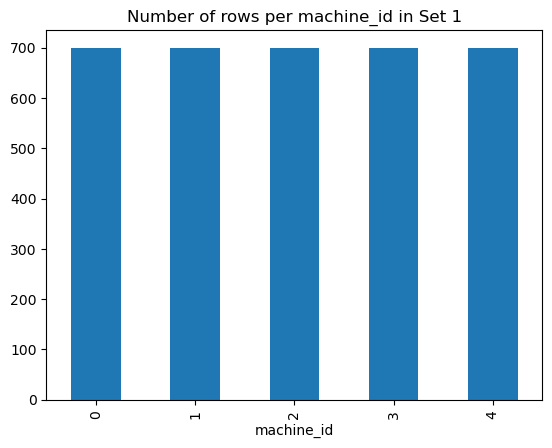

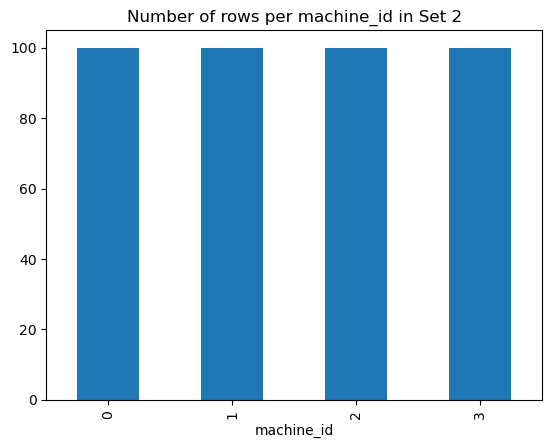

In [52]:
machine_id_counts_set1.plot(kind='bar', title='Number of rows per machine_id in Set 1')
plt.show()

machine_id_counts_set2.plot(kind='bar', title='Number of rows per machine_id in Set 2')
plt.show()

Although the data is inbalanced, the instance generated by the different LLM is balance

# **Comparative Analysis of Text Length Disparities between Human and Machine Generatione**

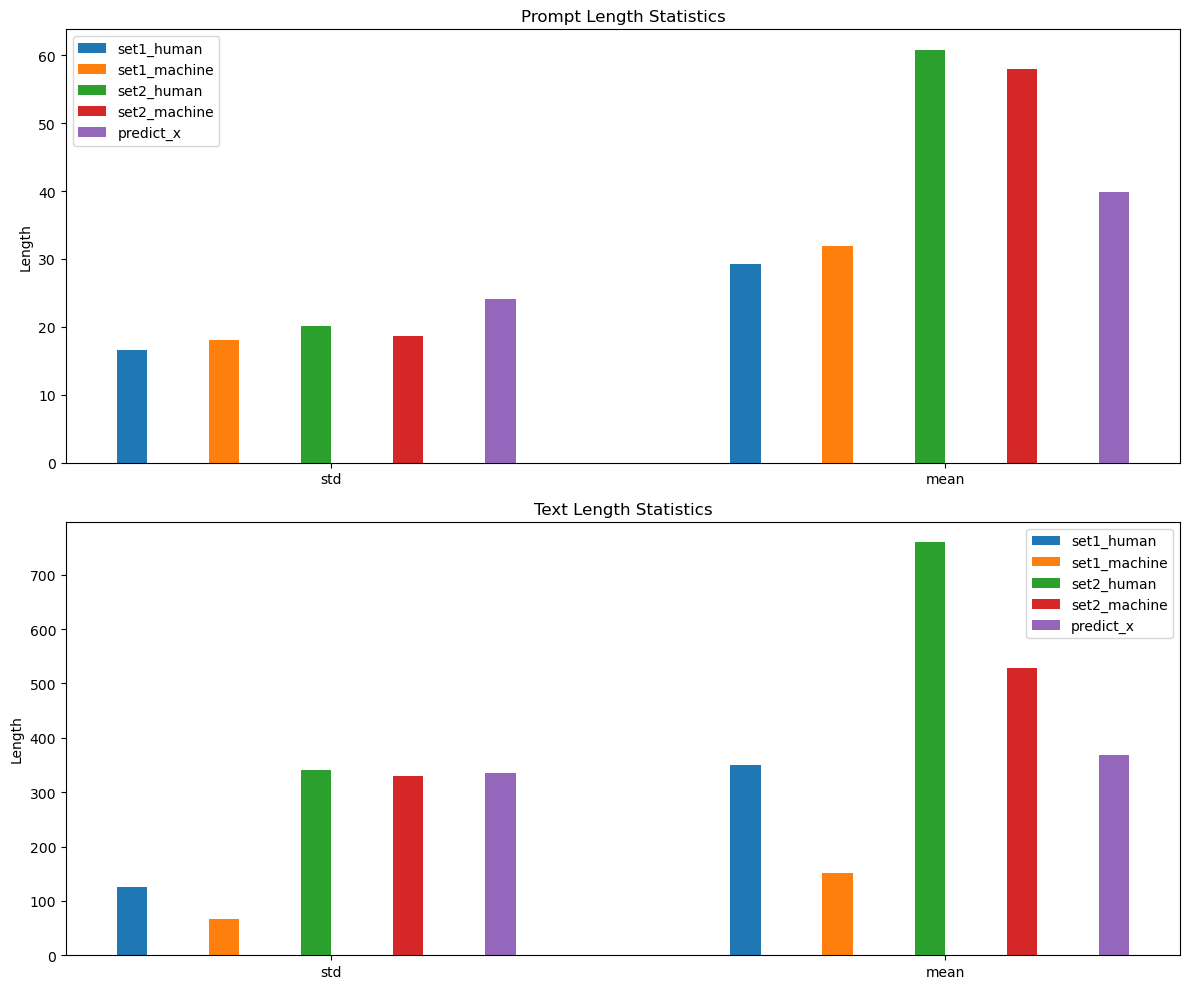

In [4]:
import numpy as np
# EDA

def create_bar_chart(title, ylabel, data_labels, data_values, ax):
    bar_width = 0.05
    group_spacing = 0.1
    num_datasets = len(data_labels)
    num_stats = len(next(iter(data_values.values())))
    x = np.arange(num_stats)

    for idx, (label, values) in enumerate(data_values.items()):
        ax.bar(x + idx * bar_width + (group_spacing * idx), values, width=bar_width, label=label)

    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xticks(x + (bar_width * num_datasets + group_spacing * (num_datasets - 1)) / 2)
    ax.set_xticklabels(['std', 'mean'])
    ax.legend()

datasets = [('set1_human', set1_human), ('set1_machine', set1_machine),
            ('set2_human', set2_human), ('set2_machine', set2_machine),
            ('predict_x', predict_x)]

fig, axes = plt.subplots(2, 1, figsize=(12, 10))

prompt_stats = {}
text_stats = {}

for name, data in datasets:
    prompt_lengths = data['prompt'].apply(len)
    txt_lengths = data['txt'].apply(len)
    
    prompt_stats[name] = [ prompt_lengths.std(), prompt_lengths.mean()]
    text_stats[name] = [ txt_lengths.std(), txt_lengths.mean()]

create_bar_chart('Prompt Length Statistics', 'Length', datasets, prompt_stats, axes[0])
create_bar_chart('Text Length Statistics', 'Length', datasets, text_stats, axes[1])

plt.tight_layout()
plt.show()

The length of the prompt and text are indeed looks different from different domain, and for the aspect of text length, it seems the human will generate long article than Machine!